In [1]:
from keras.layers.preprocessing.normalization import Normalization
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
import os

**Load Training Dataset**


In [2]:
# Read and Load data
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'drive','MyDrive','GTSRB','Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '//'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

**Load test dataset**

In [58]:


test_path = os.path.join(cur_path,'drive','MyDrive','GTSRB','Test.csv')
root_path = os.path.join(cur_path,'drive','MyDrive','GTSRB')
y_test = pd.read_csv(test_path)
test_labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(root_path+'//'+img)
    image = image.resize((30,30))
    image = np.array(image)
    data.append(image)
X_test=np.array(data)

**Split into training and validation set**

In [6]:
data = np.array(data)
labels = np.array(labels)


#print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, train_size=0.8, random_state=42, shuffle= True)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, classes)
y_val = to_categorical(y_val, classes)

(31383, 30, 30, 3) (7846, 30, 30, 3) (31383,) (7846,)


In [7]:
# Function to plot images
def visualize(**images):

    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        if image.shape[0] == 3:
          image =np.transpose(image,(1,2,0))
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()


In [8]:
# Define the parameters of the images for the model
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3
num_classes = 43

**Define model architecture**

In [53]:
model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(axis=-1),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.5),

    Dense(num_classes, activation='softmax')
])

**Define training parameters**

In [54]:
# Define loss
loss = tf.keras.losses.CategoricalCrossentropy()
# Define optimizer
optimizer = tf.keras.optimizers.Adam(0.001)
metric = 'accuracy'

In [55]:
model.compile(loss =loss, optimizer = optimizer, metrics =[metric])

**Train model**

In [56]:
epochs = 20

history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))
model.save("traffic_model.h5")

Epoch 1/20
981/981 [==============================] - 13s 9ms/step - loss: 0.3677 - accuracy: 0.9025 - val_loss: 0.0527 - val_accuracy: 0.9871
Epoch 2/20
981/981 [==============================] - 7s 8ms/step - loss: 0.0497 - accuracy: 0.9853 - val_loss: 0.0315 - val_accuracy: 0.9918
Epoch 3/20
981/981 [==============================] - 8s 8ms/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.0466 - val_accuracy: 0.9867
Epoch 4/20
981/981 [==============================] - 9s 9ms/step - loss: 0.0211 - accuracy: 0.9937 - val_loss: 0.0323 - val_accuracy: 0.9918
Epoch 5/20
981/981 [==============================] - 7s 8ms/step - loss: 0.0313 - accuracy: 0.9908 - val_loss: 0.0345 - val_accuracy: 0.9913
Epoch 6/20
981/981 [==============================] - 9s 9ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0244 - val_accuracy: 0.9936
Epoch 7/20
981/981 [==============================] - 7s 7ms/step - loss: 0.0172 - accuracy: 0.9950 - val_loss: 0.0379 - val_accuracy: 0.9892
Epoch

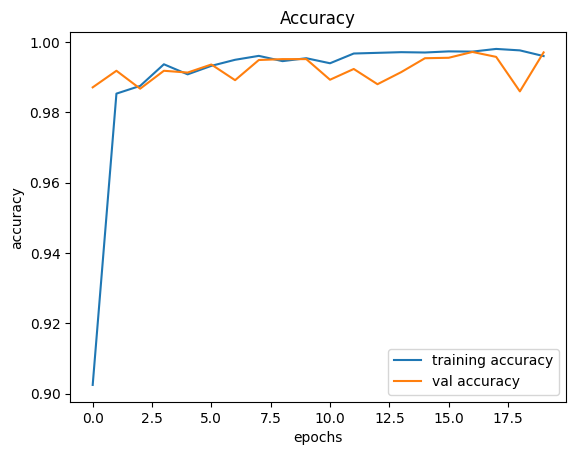

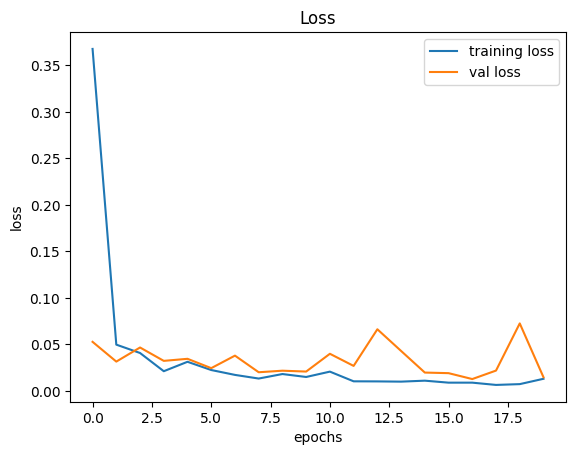

In [57]:
# Plot accuracy graphs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plot loss graphs
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [59]:
pred = model.predict(X_test)
predicted_labels = np.argmax(pred, axis=1)


# Get accuracy with test dataset
print(accuracy_score(test_labels, predicted_labels))


395/395 [==============================] - 1s 3ms/step
0.9748218527315915
